# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [97]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [99]:
#use the weater api to find the local weather in each city from the list above.
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
# local_weather = []
units = "imperial"
count = 0
api_calls = 1
weather_list = []
lat_list = []
lon_list = []
humidity = []
clouds = []
wind = []
country = []
date = []
updated_cities = []
for city in cities:
    try:
        query = f"{weather_url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query).json()
#         local_weather.append({"city":city, "response":response})
        count +=1
        if count >= 50:
            count = 0
            api_calls +=1

        weather_list.append(response["main"]["temp_max"])     
        lat_list.append(response["coord"]["lat"])
        lon_list.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        updated_cities.append(city)
        print(f"Processing Record {count} of Set {api_calls} | {city}")
    except:
        print(f"City not found. Skipping...")
        pass
    



Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | bairiki
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | leningradskiy
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | rangpo
Processing Record 12 of Set 1 | kuusamo
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | visnes
Processing Record 16 of Set 1 | bambous virieux
City not found. Skipping...
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | praxedis guerrero
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 23 of Set 1 | prince rupert
Processing Record 24 of Set 1 | turukhansk
Processing Record 25 of Set

City not found. Skipping...
Processing Record 9 of Set 5 | chico
Processing Record 10 of Set 5 | pisco
City not found. Skipping...
Processing Record 12 of Set 5 | gwadar
Processing Record 13 of Set 5 | coslada
Processing Record 14 of Set 5 | peniche
Processing Record 15 of Set 5 | zyryanka
Processing Record 16 of Set 5 | norman wells
Processing Record 17 of Set 5 | praia da vitoria
Processing Record 18 of Set 5 | kruisfontein
Processing Record 19 of Set 5 | zhezkazgan
Processing Record 20 of Set 5 | arraial do cabo
Processing Record 21 of Set 5 | cockburn town
City not found. Skipping...
City not found. Skipping...
Processing Record 24 of Set 5 | mazamari
Processing Record 25 of Set 5 | tarko-sale
Processing Record 26 of Set 5 | santa cruz
Processing Record 27 of Set 5 | fairbanks
Processing Record 28 of Set 5 | warwick
Processing Record 29 of Set 5 | mahibadhoo
Processing Record 30 of Set 5 | nanortalik
Processing Record 31 of Set 5 | saint-philippe
Processing Record 32 of Set 5 | kon

Processing Record 12 of Set 9 | brae
Processing Record 13 of Set 9 | biak
Processing Record 14 of Set 9 | nouadhibou
Processing Record 15 of Set 9 | zabid
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 9 | touros
Processing Record 19 of Set 9 | vredendal
Processing Record 20 of Set 9 | freetown
Processing Record 21 of Set 9 | banda aceh
City not found. Skipping...
Processing Record 23 of Set 9 | ilhabela
Processing Record 24 of Set 9 | provideniya
Processing Record 25 of Set 9 | villa bruzual
Processing Record 26 of Set 9 | young
Processing Record 27 of Set 9 | burns lake
Processing Record 28 of Set 9 | nchelenge
Processing Record 29 of Set 9 | pacific grove
Processing Record 30 of Set 9 | buchanan
Processing Record 31 of Set 9 | san lawrenz
Processing Record 32 of Set 9 | rawah
Processing Record 33 of Set 9 | saint anthony
Processing Record 34 of Set 9 | sawtell
City not found. Skipping...
Processing Record 36 of Set 9 | qena
Processing Record 37 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:
weather_df = pd.DataFrame({
    "City": updated_cities,
    "Lat": lat_list,
    "Lng": lon_list,
    "Max Temp": weather_list,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
    
})

weather_df.to_csv('Weather_DataFrame.csv',index=False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.97,102.50,-31.13,84,74,8.39,RU,1609284659
1,rikitea,-23.12,-134.97,78.06,75,84,7.76,PF,1609284659
2,busselton,-33.65,115.33,70.00,70,19,3.00,AU,1609284659
3,airai,-8.93,125.41,64.00,98,100,0.20,TL,1609284659
4,ushuaia,-54.80,-68.30,51.80,50,75,24.16,AR,1609284493
...,...,...,...,...,...,...,...,...,...
548,libreville,0.39,9.45,80.60,88,40,6.93,GA,1609284826
549,salalah,17.02,54.09,69.80,46,0,2.24,OM,1609284826
550,atambua,-9.11,124.89,78.67,79,100,2.13,ID,1609284827
551,makrana,27.05,74.72,38.71,72,0,4.72,IN,1609284827


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [104]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.394069,19.904521,48.747631,75.443038,53.694394,10.161754,1.609285e+09
std,33.448770,91.052692,32.345754,16.916486,39.372003,44.757888,7.727559e+01
min,-54.800000,-179.170000,-51.970000,20.000000,0.000000,0.200000,1.609284e+09
25%,-6.980000,-57.630000,30.990000,69.000000,12.000000,3.440000,1.609285e+09
50%,23.270000,21.380000,60.010000,80.000000,69.000000,6.930000,1.609285e+09
75%,49.980000,100.350000,76.060000,87.000000,91.000000,11.320000,1.609285e+09
max,78.220000,178.420000,89.010000,100.000000,100.000000,1050.470000,1.609285e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

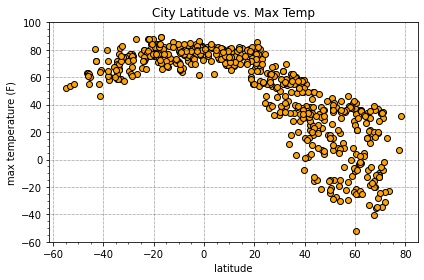

In [206]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],marker='o', color='orange', edgecolor="black")
plt.xlabel("latitude")
plt.ylabel("max temperature (F)")
plt.title("City Latitude vs. Max Temp")
plt.ylim(-60,100)
plt.tight_layout()
plt.minorticks_on()
plt.grid(color='black', linestyle=':', linewidth=.5)
plt.show
plt.savefig('Latitude-v-Temperature Plot.png')

## Latitude vs. Humidity Plot

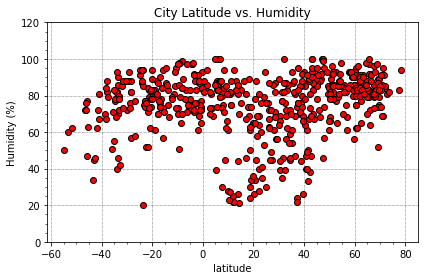

In [207]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],marker='o', color='red', edgecolor="black")
plt.xlabel("latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.ylim(0,120)
plt.tight_layout()
plt.minorticks_on()
plt.grid(color='black', linestyle=':', linewidth=.5)
plt.show
plt.savefig('Latitude-v-Humidity Plot.png')

## Latitude vs. Cloudiness Plot

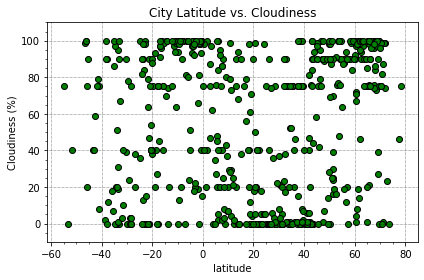

In [208]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],marker='o', color='green', edgecolor="black")
plt.xlabel("latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.ylim(-10,110)
plt.tight_layout()

plt.minorticks_on()
plt.grid(color='black', linestyle=':', linewidth=.5)
plt.show
plt.savefig('Latitude-v-Cloudiness Plot.png')

## Latitude vs. Wind Speed Plot

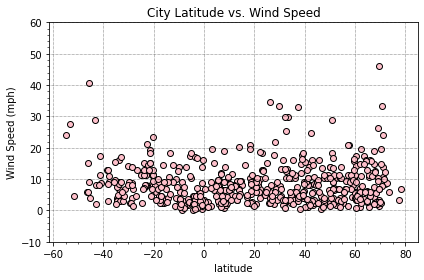

In [209]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],marker='o', color='pink', edgecolor="black")
plt.xlabel("latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.ylim(-10,60)
plt.tight_layout()

plt.minorticks_on()
plt.grid(color='black', linestyle=':', linewidth=.5)


plt.show
plt.savefig('Latitude-v-Wind Speed Plot.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8185785085410943


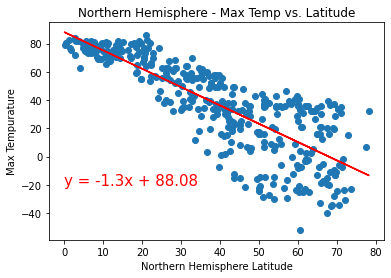

<Figure size 432x288 with 0 Axes>

In [210]:
northern_hem = weather_df.loc[weather_df['Lat'] >= 0]

x_values = northern_hem["Lat"]
y_values = northern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Max Tempurature")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5661931736415189


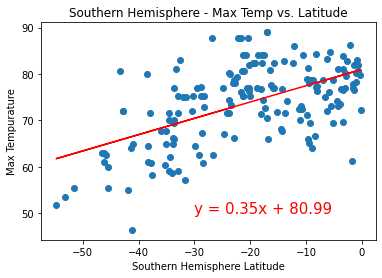

<Figure size 432x288 with 0 Axes>

In [211]:
southern_hem = weather_df.loc[weather_df['Lat'] < 0]
x_values = southern_hem["Lat"]
y_values = southern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Max Tempurature")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3199518298073311


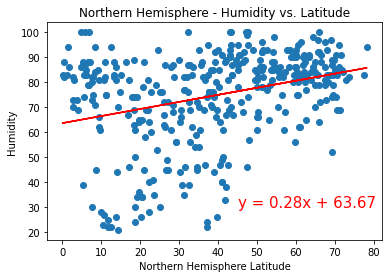

<Figure size 432x288 with 0 Axes>

In [212]:
northern_hem = weather_df.loc[weather_df['Lat'] >= 0]

x_values = northern_hem["Lat"]
y_values = northern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.35188455759136017


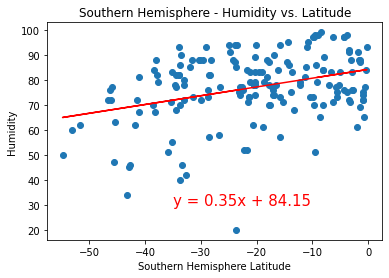

<Figure size 432x288 with 0 Axes>

In [213]:
southern_hem = weather_df.loc[weather_df['Lat'] < 0]
x_values = southern_hem["Lat"]
y_values = southern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.36245777411077507


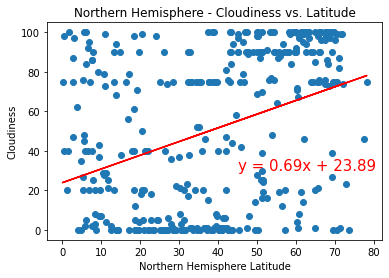

<Figure size 432x288 with 0 Axes>

In [214]:
northern_hem = weather_df.loc[weather_df['Lat'] >= 0]

x_values = northern_hem["Lat"]
y_values = northern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28703069687225846


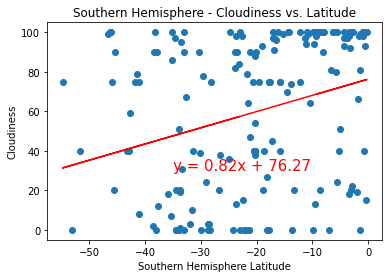

<Figure size 432x288 with 0 Axes>

In [215]:
southern_hem = weather_df.loc[weather_df['Lat'] < 0]
x_values = southern_hem["Lat"]
y_values = southern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.08173098936757467


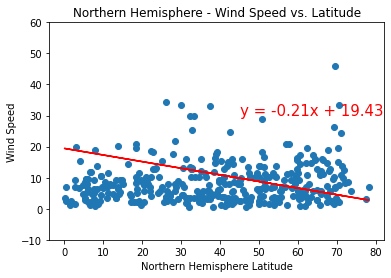

<Figure size 432x288 with 0 Axes>

In [216]:
northern_hem = weather_df.loc[weather_df['Lat'] >= 0]

x_values = northern_hem["Lat"]
y_values = northern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.ylim(-10,60)
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3095732433770745


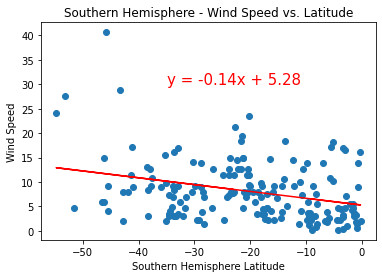

<Figure size 432x288 with 0 Axes>

In [217]:
outhern_hem = weather_df.loc[weather_df['Lat'] < 0]
x_values = southern_hem["Lat"]
y_values = southern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')